In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

### Upload the dataset and check it 

In [2]:
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df["Year"].max()

np.float64(2020.0)

In [7]:
df["Year"].sort_values(ascending = False).head(10).to_frame()

,Year
5957,2020.0
14390,2017.0
16438,2017.0
16241,2017.0
10814,2016.0
10827,2016.0
16530,2016.0
16550,2016.0
16570,2016.0
15369,2016.0


In [8]:
df["Year"].min()

np.float64(1980.0)

In [9]:
df.shape

(16598, 11)

#### Global sales per genre 

In [10]:
genre_sales = (df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).head(15))

In [11]:
genre_sales.to_frame()

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


In [12]:
genre_sales.info()

<class 'pandas.core.series.Series'>
Index: 12 entries, Action to Strategy
Series name: Global_Sales
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


In [13]:
genre_sales.shape

(12,)

Text(0, 0.5, 'Global Sales')

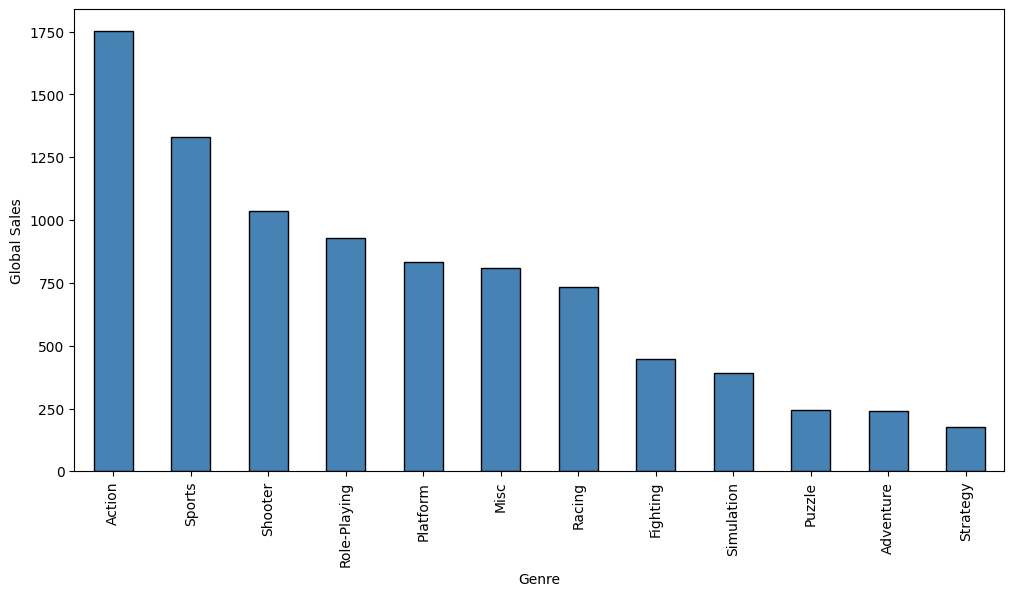

In [14]:
plt.figure(figsize = (12, 6))
genre_sales.plot(kind = "bar", color = "steelblue", edgecolor = "black")
plt.xlabel("Genre")
plt.ylabel("Global Sales")

#### Top 20 Global sales per publisher 

In [15]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
publisher_sales = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending = False).head(20)

In [17]:
publisher_sales.to_frame()

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
Take-Two Interactive,399.54
THQ,340.77
Konami Digital Entertainment,283.64
Sega,272.99


In [18]:
publisher_sales.info()

<class 'pandas.core.series.Series'>
Index: 20 entries, Nintendo to Midway Games
Series name: Global_Sales
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes


In [19]:
publisher_sales.shape

(20,)

Text(0, 0.5, 'Global Sales')

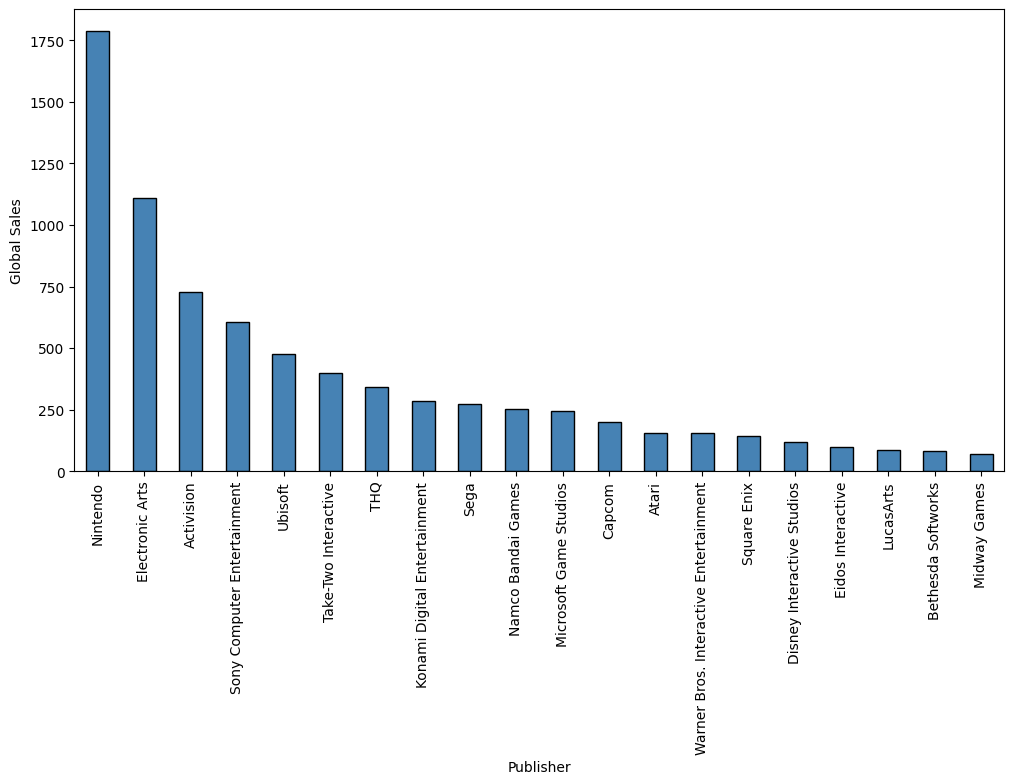

In [20]:
plt.figure(figsize = (12, 6))
publisher_sales.plot(kind = "bar", color = "steelblue", edgecolor = "black")
plt.xlabel("Publisher")
plt.ylabel("Global Sales")

#### Global sales per year

In [21]:
year_sales = df.groupby("Year")["Global_Sales"].sum().sort_index(ascending = False) 

In [22]:
year_sales.head(10).to_frame()

,Global_Sales
Year,
2020.0,0.29
2017.0,0.05
2016.0,70.93
2015.0,264.44
2014.0,337.05
2013.0,368.11
2012.0,363.54
2011.0,515.99
2010.0,600.45


In [23]:
year_sales.shape

(39,)

In [24]:
year_sales.info()

<class 'pandas.core.series.Series'>
Index: 39 entries, 2020.0 to 1980.0
Series name: Global_Sales
Non-Null Count  Dtype  
--------------  -----  
39 non-null     float64
dtypes: float64(1)
memory usage: 624.0 bytes


Text(0, 0.5, 'Global Sales')

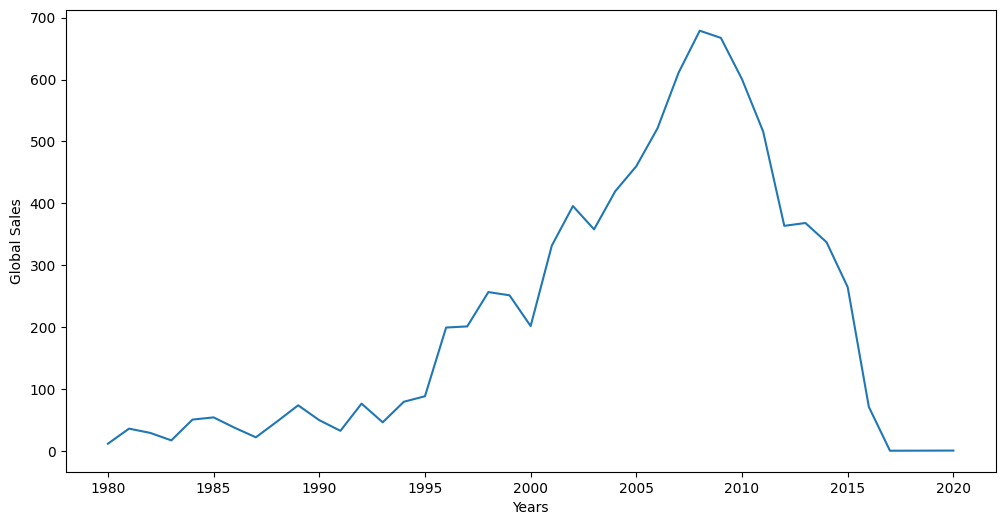

In [25]:
plt.figure(figsize = (12, 6))
year_sales.plot(kind = "line")
plt.xlabel("Years")
plt.ylabel("Global Sales")

In [26]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Text(0, 0.5, 'Global Sales')

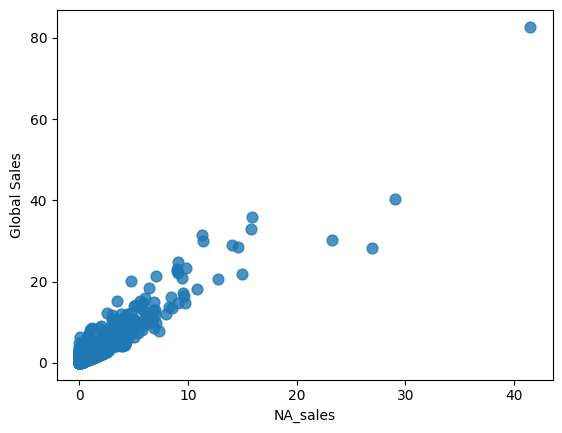

In [27]:
plt.scatter(data = df, x = "NA_Sales", y = "Global_Sales", alpha = 0.8, s = 60)
plt.xlabel("NA_sales")
plt.ylabel("Global Sales")

Text(0, 0.5, 'Global Sales')

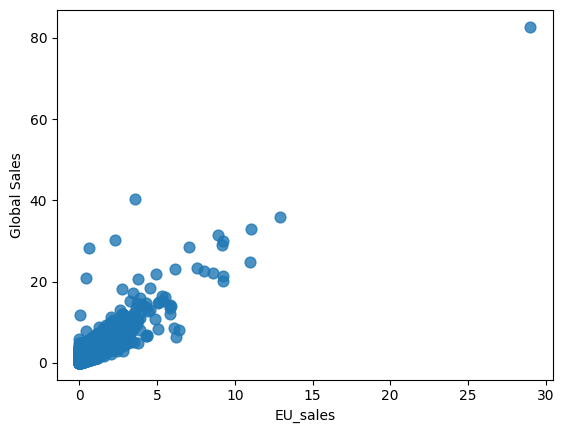

In [28]:
plt.scatter(data = df, x = "EU_Sales", y = "Global_Sales", alpha = 0.8, s = 60)
plt.xlabel("EU_sales")
plt.ylabel("Global Sales")

Text(0, 0.5, 'Global Sales')

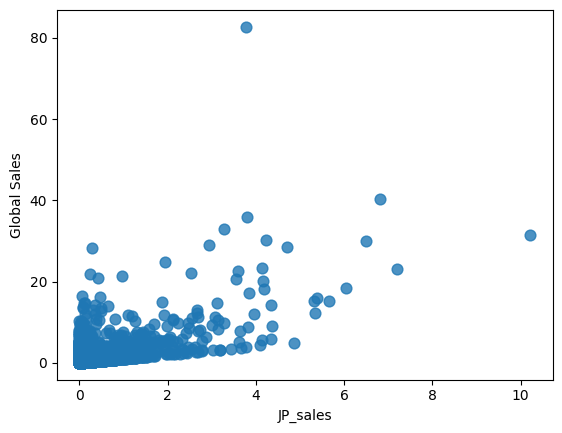

In [29]:
plt.scatter(data = df, x = "JP_Sales", y = "Global_Sales", alpha = 0.8, s = 60)
plt.xlabel("JP_sales")
plt.ylabel("Global Sales")

np.float64(0.9410473571255515)

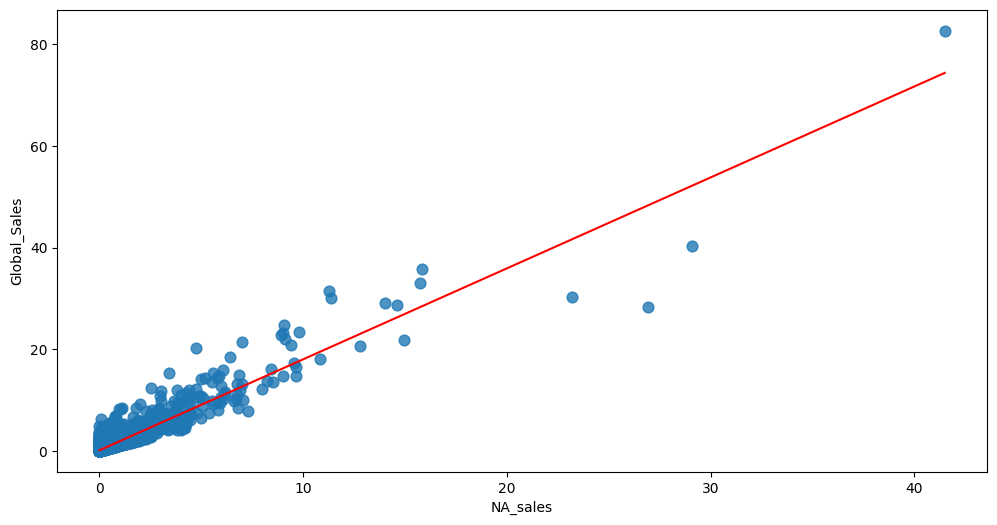

In [30]:
plt.figure(figsize=(12, 6))

plt.scatter(df["NA_Sales"], df["Global_Sales"], alpha=0.8, s=60)

z = np.polyfit(df['NA_Sales'], df['Global_Sales'], 1)
p = np.poly1d(z)
plt.plot(df["NA_Sales"], p(df["NA_Sales"]), color = "red")

plt.xlabel("NA_sales")
plt.ylabel("Global_Sales")

df["NA_Sales"].corr(df["Global_Sales"])

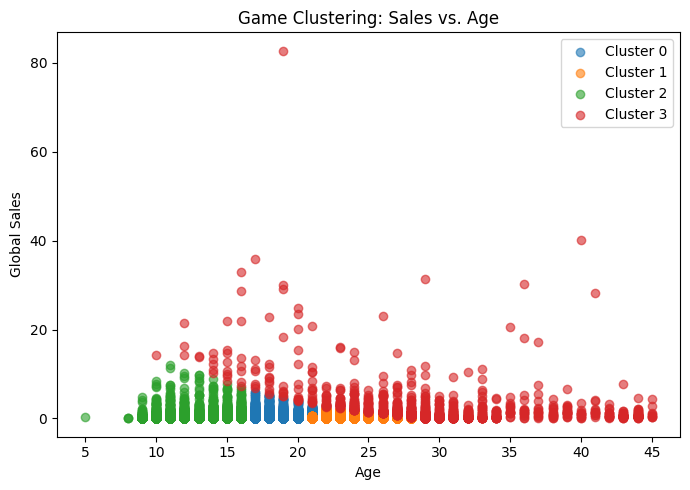

In [31]:
df["Age"] = 2025 - df["Year"]
df2 = df.dropna(subset=["Global_Sales", "Age"]).copy()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df2[["Global_Sales", "Age"]])
kmeans = MiniBatchKMeans(n_clusters=4,random_state=42, batch_size=1000, n_init=10)
df2["Cluster"] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(7, 5))
for c in range(4):
    subset = df2[df2["Cluster"] == c]
    plt.scatter(subset["Age"], subset["Global_Sales"], label=f"Cluster {c}", alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Global Sales")
plt.title("Game Clustering: Sales vs. Age")
plt.legend()
plt.tight_layout()
plt.show()